In [36]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data, io
from skimage.color import label2rgb
import skimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
%matplotlib inline
import glob as gb

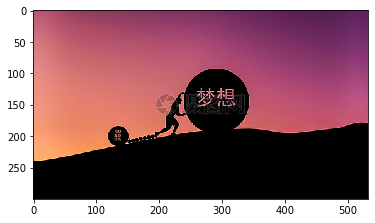

In [37]:
img = cv2.imread('colorimg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img2 = img[:,:,::-1] # 必须为 ::-1
plt.imshow(img)


In [38]:
# bins for histogram
bins = 8

# train_test_split size
test_size = 0.10

# seed for reproducing same results
seed = 9

# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [39]:
feature = fd_hu_moments(img)
feature.shape

(7,)

In [40]:
# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [41]:
feature_colorhist = fd_histogram(img)

In [42]:
feature_colorhist.shape

(512,)

In [43]:
import mahotas


In [44]:
# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [45]:
feature_haralick = fd_haralick(img)

In [47]:
feature_haralick.shape

(13,)

In [16]:
#合并特征

# global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

In [18]:
# import the necessary packages
from skimage import feature
def LBP_describe(image, eps=1e-7):
    # compute the Local Binary Pattern representation
    # of the image, and then use the LBP representation
    # to build the histogram of patterns
    lbp = feature.local_binary_pattern(image,8,
    3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
    bins=np.arange(0, 8 + 3),
    range=(0, 8 + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    # return the histogram of Local Binary Patterns
    return hist

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lbp_feas = LBP_describe(gray)

In [34]:
lbp_feas.shape

(10,)

## test

In [24]:
from skimage import feature
def LBP_describe(image, eps=1e-7):
    # compute the Local Binary Pattern representation
    # of the image, and then use the LBP representation
    # to build the histogram of patterns
    lbp = feature.local_binary_pattern(image,8,
    3, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
    bins=np.arange(0, 8 + 3),
    range=(0, 8 + 2))
    # normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    # return the histogram of Local Binary Patterns
    return hist

In [25]:
def fd_hu_moments(image):
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [26]:
def fd_haralick(image):
    # convert the image to grayscale
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(image).mean(axis=0)
    # return the result
    return haralick

In [27]:
def feature_ex(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hist_lbp = LBP_describe(gray)
    hist_hu = fd_hu_moments(gray)
    hist_hara = fd_haralick(gray)
    hist_feature = np.hstack([hist_lbp, hist_hu, hist_hara])
    return hist_feature

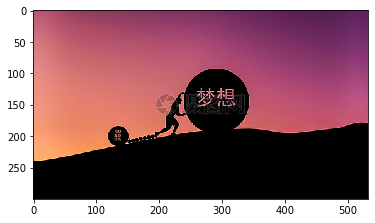

In [28]:
img = cv2.imread('colorimg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img2 = img[:,:,::-1] # 必须为 ::-1
plt.imshow(img)

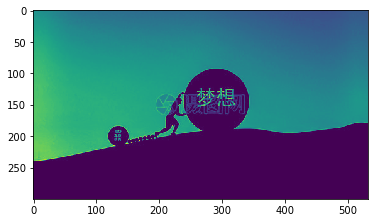

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [31]:
 hist = feature_ex(img)

In [33]:
hist.shape

(30,)